In [7]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('C:\\Users\\Home\\Desktop\\DataTrained'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Home\Desktop\DataTrained\10_Property_stolen_and_recovered.csv
C:\Users\Home\Desktop\DataTrained\assignment3.html
C:\Users\Home\Desktop\DataTrained\Big_Mart_Sales_Prediction.ipynb
C:\Users\Home\Desktop\DataTrained\big_mart_test.csv
C:\Users\Home\Desktop\DataTrained\big_mart_train.csv
C:\Users\Home\Desktop\DataTrained\covid_dataset.csv
C:\Users\Home\Desktop\DataTrained\Covid_death_prediction.ipynb
C:\Users\Home\Desktop\DataTrained\data.csv
C:\Users\Home\Desktop\DataTrained\data_copy.csv
C:\Users\Home\Desktop\DataTrained\data_copy2.csv
C:\Users\Home\Desktop\DataTrained\data_copy3.csc
C:\Users\Home\Desktop\DataTrained\Employee Salary Prediction.ipynb
C:\Users\Home\Desktop\DataTrained\Employee Salary.csv
C:\Users\Home\Desktop\DataTrained\happiness_score.csv
C:\Users\Home\Desktop\DataTrained\happiness_score_dataset.txt
C:\Users\Home\Desktop\DataTrained\happiness_score_prediction.ipynb
C:\Users\Home\Desktop\DataTrained\temp-plot.html
C:\Users\Home\Desktop\DataTrained\titanic.ipynb
C:

In [6]:
property=pd.read_csv("C:\\Users\\Home\\Desktop\\DataTrained\\10_Property_stolen_and_recovered.csv")
property

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


It is a balanced datasets with almost equal instances from different states

In [8]:
property.Area_Name.value_counts()

Madhya Pradesh               70
Sikkim                       70
Tamil Nadu                   70
Tripura                      70
Daman & Diu                  70
West Bengal                  70
Nagaland                     70
Jharkhand                    70
Uttarakhand                  70
Maharashtra                  70
Andhra Pradesh               70
Odisha                       70
Gujarat                      70
Goa                          70
Karnataka                    70
Bihar                        70
Mizoram                      70
Manipur                      70
Jammu & Kashmir              70
Meghalaya                    70
Punjab                       70
Arunachal Pradesh            70
Rajasthan                    70
Uttar Pradesh                70
Kerala                       70
Chhattisgarh                 70
Chandigarh                   70
Assam                        70
Himachal Pradesh             70
Dadra & Nagar Haveli         70
Andaman & Nicobar Islands    70
Haryana 

In [9]:
property.Year.value_counts()

2009    245
2005    245
2003    245
2001    245
2010    245
2008    245
2006    245
2004    245
2002    245
2007    244
Name: Year, dtype: int64

In [10]:
property.Group_Name.value_counts()

Robbery - Property                     350
Criminal Breach of Trust - Property    350
Theft - Property                       350
Dacoity -Property                      350
Burglary - Property                    350
Other heads of Property                350
Total Property                         349
Name: Group_Name, dtype: int64

Group Name and Sub Group Name have the same number

In [11]:
property.Sub_Group_Name.value_counts()

4. Theft                                350
3. Burglary                             350
2. Robbery                              350
5. Criminal Breach of Trust             350
6. Other Property                       350
1. Dacoity                              350
7. Total Property Stolen & Recovered    349
Name: Sub_Group_Name, dtype: int64

In [12]:
a=property.groupby(['Group_Name']).get_group('Robbery - Property')
a.Sub_Group_Name.value_counts()

2. Robbery    350
Name: Sub_Group_Name, dtype: int64

Since all the values of Sub Group Name from the Group Name ='Robbery - Property' are '2. Robbery' we can safely delete Sub_Group_Name from the dataset

In [13]:
a=property.groupby(['Group_Name']).get_group('Total Property')
a.Sub_Group_Name.value_counts()

7. Total Property Stolen & Recovered    349
Name: Sub_Group_Name, dtype: int64

In [14]:
#Since Sub_Group_Name is an irrelevant variable as previously proven ,we will use property1 as the base dataset
property1=property.drop(['Sub_Group_Name'],axis=1)

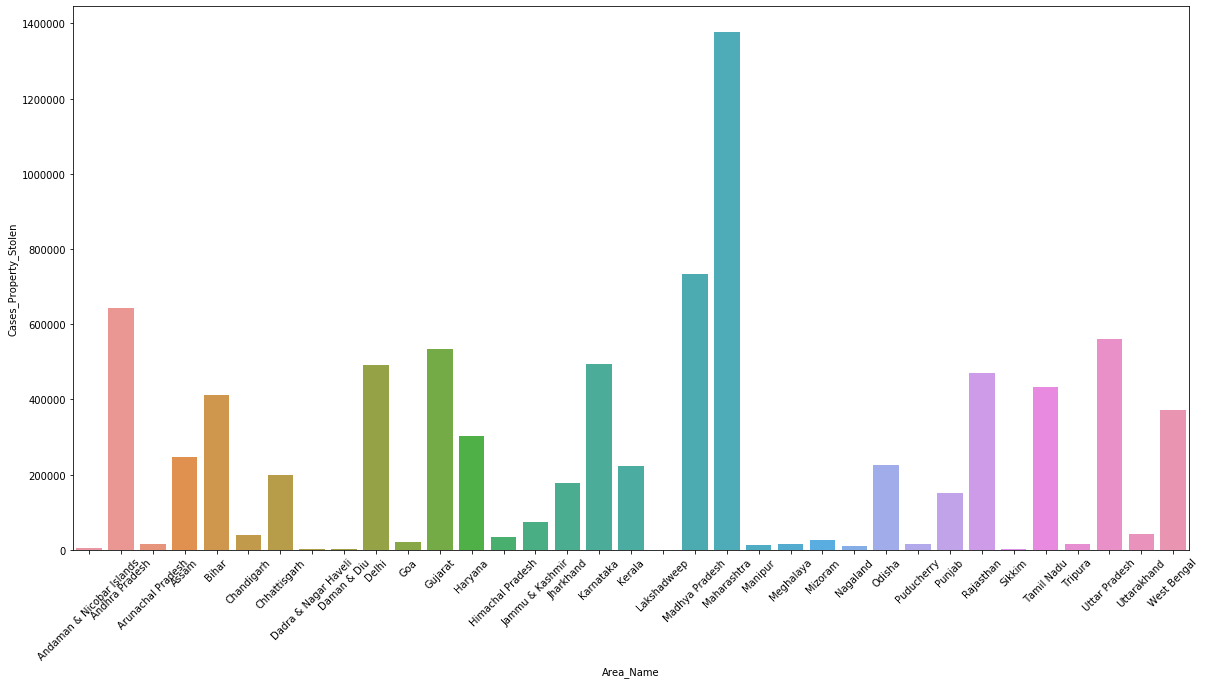

In [15]:
property_bystate=property1.groupby(['Area_Name'],as_index=False).sum()
property_bystate.drop("Year",axis=1,inplace=True)
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

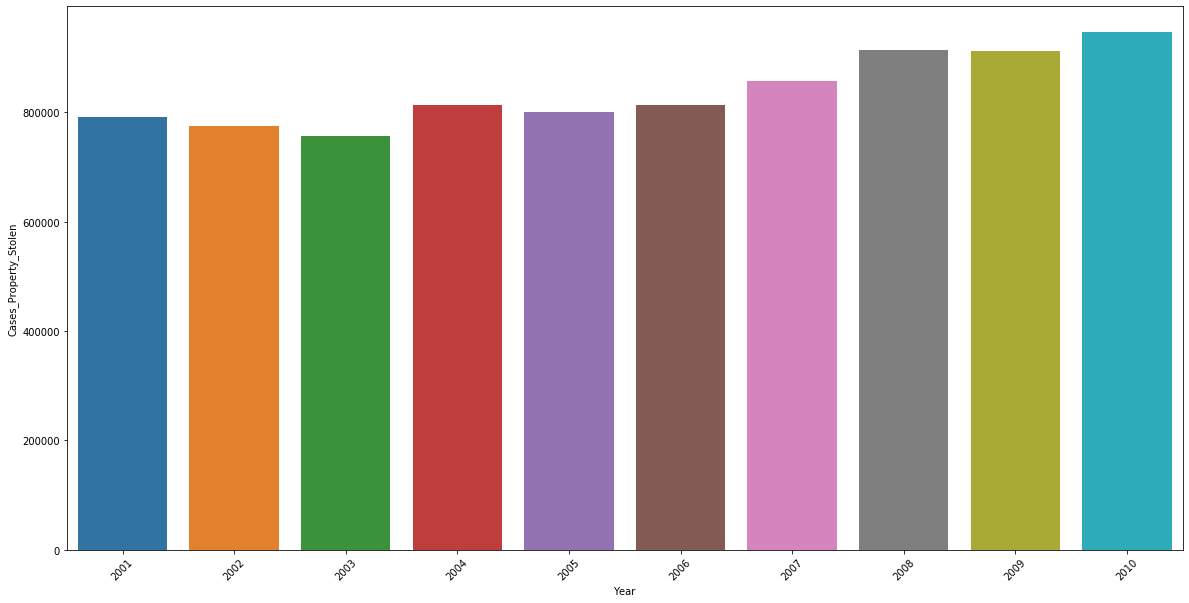

In [16]:
#Cases of Property Stolen across the year of all the States 
sortbyyear=property1.groupby(['Year'],as_index=False).sum()
sortbyyear
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

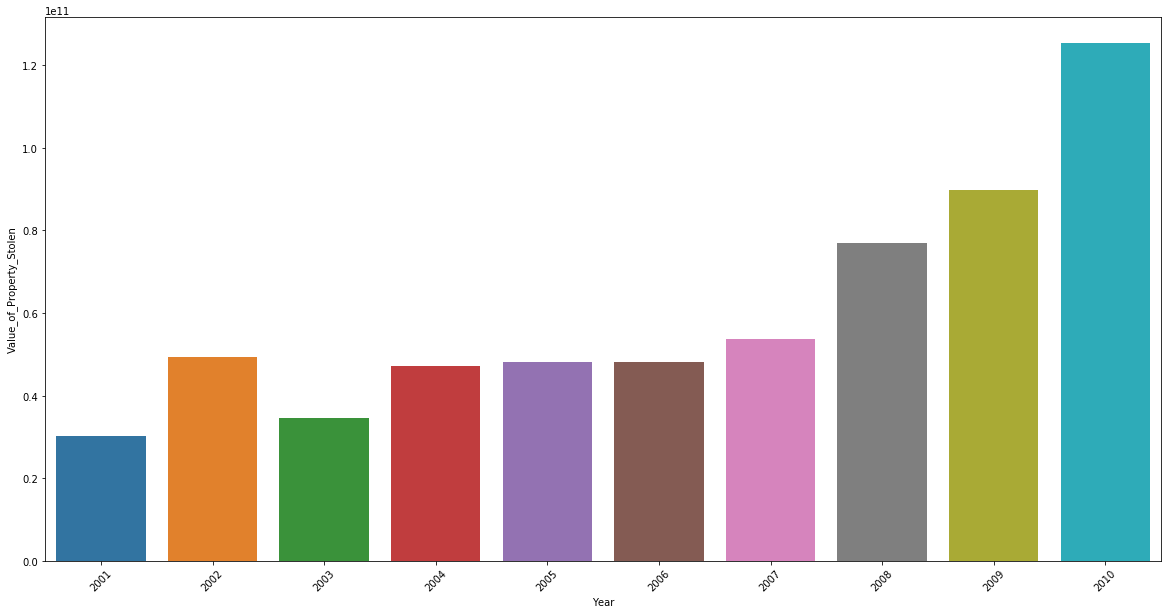

In [17]:
#Value of Property Stolen across the year of all the States 

plt.figure(figsize = (20, 10))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

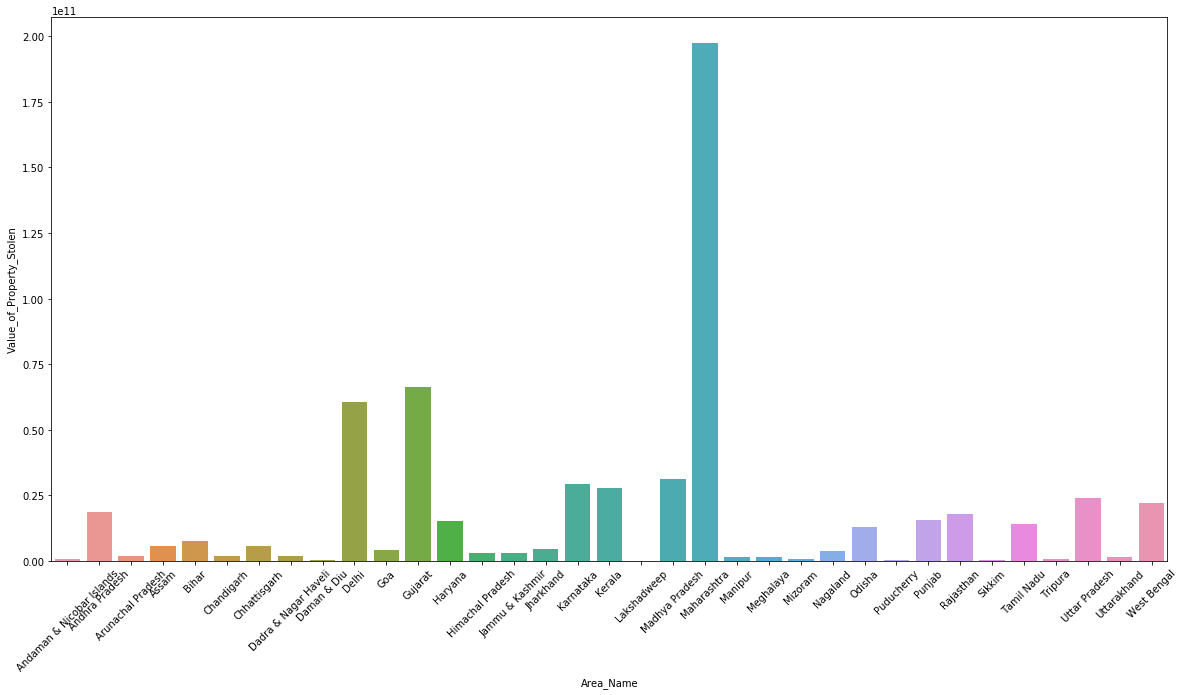

In [18]:
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

 Maharashtra has the most number of cases of stolen property and the value of the property stolen by a big margin So lets find out more about Maharashtra from the original dataset

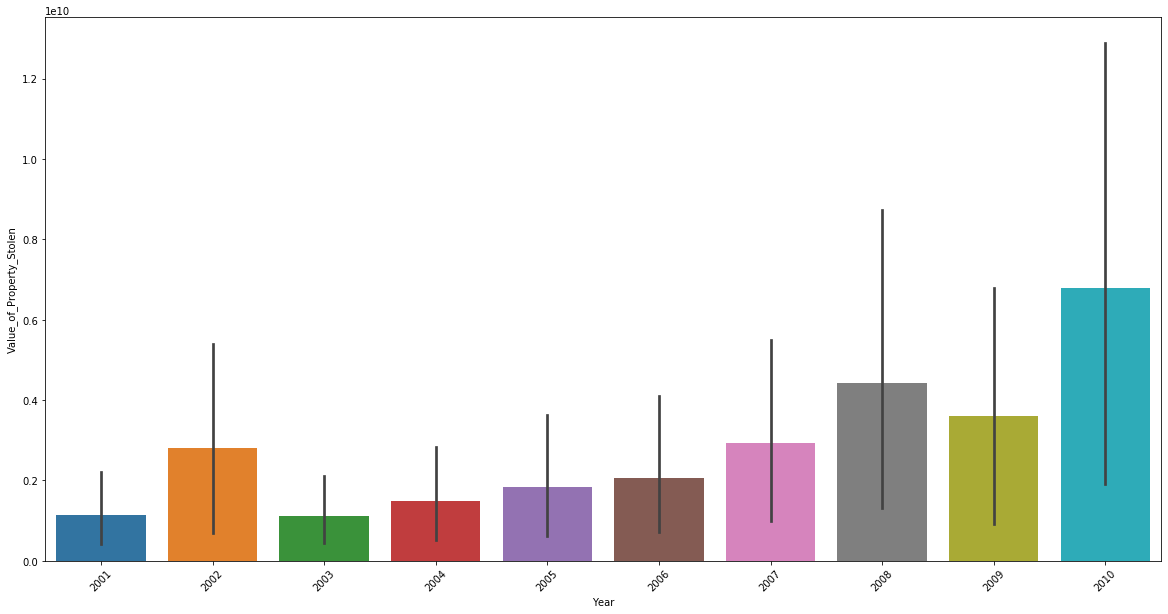

In [19]:
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=a.Year,y=a.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

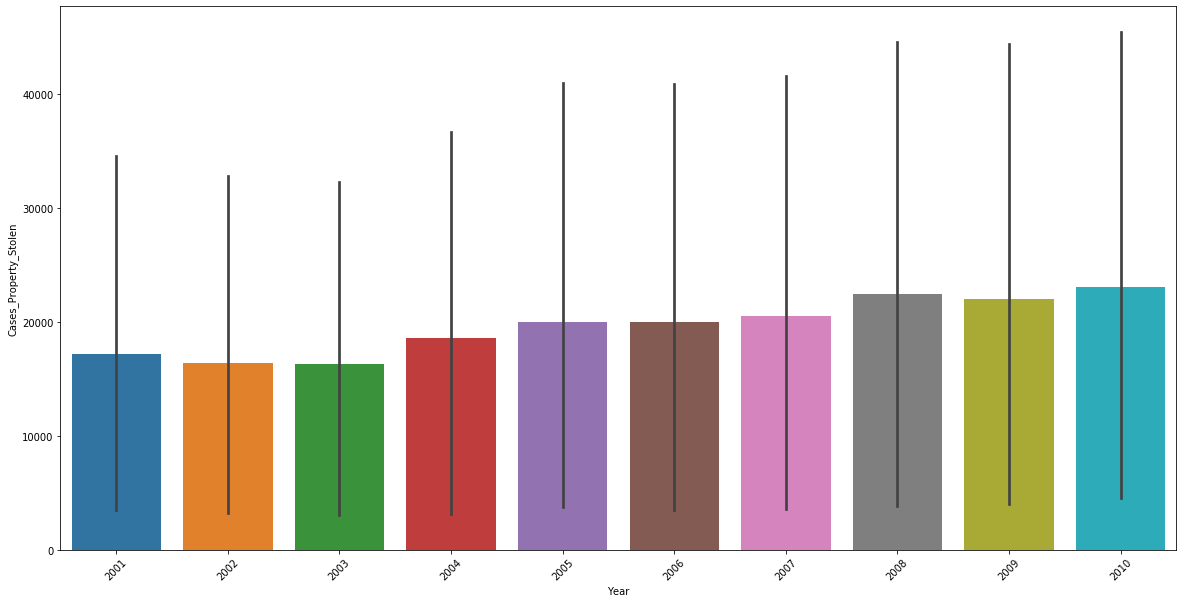

In [20]:
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=a.Year,y=a.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

In [21]:
property.groupby(['Group_Name']).get_group('Robbery - Property')

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
1400,Andaman & Nicobar Islands,2001,Robbery - Property,2. Robbery,2,4,2000,40000
1401,Andhra Pradesh,2001,Robbery - Property,2. Robbery,293,622,7149310,22872277
1402,Arunachal Pradesh,2001,Robbery - Property,2. Robbery,30,84,1436973,2535439
1403,Assam,2001,Robbery - Property,2. Robbery,146,687,3773502,16336928
1404,Bihar,2001,Robbery - Property,2. Robbery,441,2201,12827627,51594151
...,...,...,...,...,...,...,...,...
1745,Tamil Nadu,2010,Robbery - Property,2. Robbery,1326,1817,70981709,117163496
1746,Tripura,2010,Robbery - Property,2. Robbery,16,63,396035,1318455
1747,Uttar Pradesh,2010,Robbery - Property,2. Robbery,1223,2007,121061420,246998602
1748,Uttarakhand,2010,Robbery - Property,2. Robbery,100,152,8107570,14016919


Scatter Plot between Cases of Property Recovered and Stolen

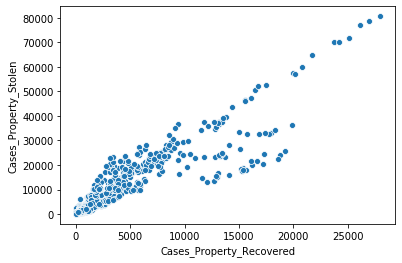

In [22]:
sns.scatterplot(x=property.Cases_Property_Recovered,y=property.Cases_Property_Stolen)

The following code below gives us a difference of the Cases of Property Recovered from Total Cases of Property Stolen